In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [8]:
data = pd.read_csv('features_time.csv')

In [9]:
data['Status'] = pd.Categorical(data['Status'])

In [10]:
data['Status'].value_counts()

transition    120
stable        120
unstable      100
Name: Status, dtype: int64

In [11]:
data

,Unnamed: 0,mean,std,rms,Peak-to-Peak,Kurtosis,Skewness,Crest,shape_factor,Status
0,0,23.335318,15.047893,27.762475,99.317060,0.143753,-0.220421,2.410229,1.189719,stable
1,1,23.490211,17.022671,29.004799,140.822698,2.281786,0.251258,3.482453,1.234761,stable
2,2,21.615567,13.863735,25.675829,80.046586,-0.107346,0.181700,2.432906,1.187840,stable
3,3,21.496864,13.070224,25.155101,84.493619,0.541329,-0.382638,2.188628,1.170175,stable
4,4,20.521180,16.470847,26.308605,99.317060,0.126628,-0.111501,2.599768,1.282022,stable
...,...,...,...,...,...,...,...,...,...,...
335,335,38.530794,2699.395255,2698.351981,8886.653395,-1.409113,0.318021,1.921709,70.031051,unstable
336,336,63.813158,2736.100840,2735.508935,8842.183070,-1.421717,0.328107,1.862009,42.867475,unstable
337,337,49.403730,2715.152553,2714.276117,8822.912595,-1.432751,0.327478,1.874937,54.940712,unstable
338,338,51.300089,2744.434620,2743.573890,9117.899088,-1.421678,0.326265,1.894897,53.480880,unstable


In [13]:
test = data.drop(['Unnamed: 0'],axis=1)
#test = data.drop(['Unnamed: 0','RMS'],axis=1)
#test = data.drop(['Unnamed: 0','RMS','Peak-to-Peak'],axis=1)

In [14]:
test.iloc[:,:-1]

,mean,std,rms,Peak-to-Peak,Kurtosis,Skewness,Crest,shape_factor
0,23.335318,15.047893,27.762475,99.317060,0.143753,-0.220421,2.410229,1.189719
1,23.490211,17.022671,29.004799,140.822698,2.281786,0.251258,3.482453,1.234761
2,21.615567,13.863735,25.675829,80.046586,-0.107346,0.181700,2.432906,1.187840
3,21.496864,13.070224,25.155101,84.493619,0.541329,-0.382638,2.188628,1.170175
4,20.521180,16.470847,26.308605,99.317060,0.126628,-0.111501,2.599768,1.282022
...,...,...,...,...,...,...,...,...
335,38.530794,2699.395255,2698.351981,8886.653395,-1.409113,0.318021,1.921709,70.031051
336,63.813158,2736.100840,2735.508935,8842.183070,-1.421717,0.328107,1.862009,42.867475
337,49.403730,2715.152553,2714.276117,8822.912595,-1.432751,0.327478,1.874937,54.940712
338,51.300089,2744.434620,2743.573890,9117.899088,-1.421678,0.326265,1.894897,53.480880


In [15]:
scaler = StandardScaler().fit(test.iloc[:,:-1])

In [16]:
test_scaled = (test.iloc[:,:-1].values - scaler.mean_)/np.sqrt(scaler.var_)

In [17]:
with open('model_lr_8f_all','rb') as f:
    lrm = pickle.load(f)

In [18]:
test_predictions = lrm.predict(test_scaled)

## Confusion Matrices

In [19]:
test_confusion_matrix = confusion_matrix(test['Status'], test_predictions)


### Acuracy Calculation

In [20]:

test_accuracy = accuracy_score(test['Status'], test_predictions)
print("Ovearll testing accuracy: ", test_accuracy)

Ovearll testing accuracy:  0.7588235294117647


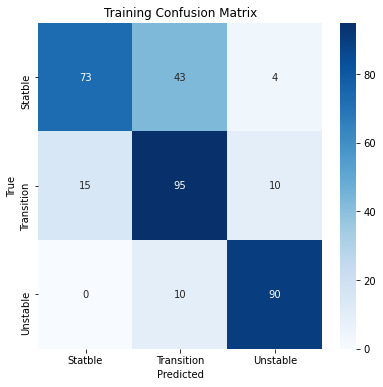

In [21]:

status_of_signal = ['Statble','Transition','Unstable']
plt.figure(figsize=(14,6))
plt.subplot(121)
sns.heatmap(test_confusion_matrix, annot= True,fmt = "d",
xticklabels=status_of_signal, yticklabels=status_of_signal, cmap = "Blues")
plt.title('Training Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')


plt.show()

## Testing decision tree

In [22]:

from sklearn import tree


In [23]:
with open('model_dt_8f_all','rb') as f:
    dt= pickle.load(f)

In [24]:
test_predict = dt.predict(test_scaled)

In [25]:
test_confusion = confusion_matrix(test['Status'], test_predict)


In [26]:
test_accu = accuracy_score(test['Status'], test_predict)
print("Ovearll testing accuracy: ", test_accu)

Ovearll testing accuracy:  0.4970588235294118


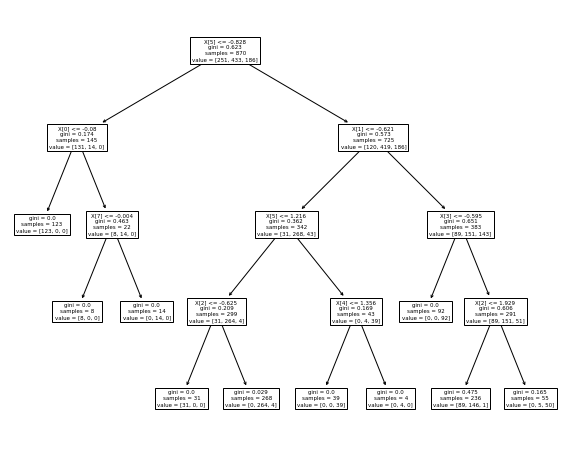

In [27]:
plt.figure(figsize = (10,8))
tree.plot_tree(dt) 
plt.savefig('dt.jpg', dpi = 400)

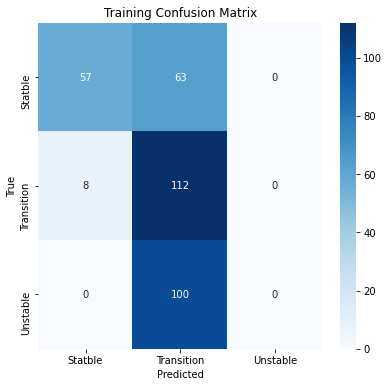

In [28]:
status_of_signal = ['Statble','Transition','Unstable']
plt.figure(figsize=(14,6))
plt.subplot(121)
sns.heatmap(test_confusion, annot= True,fmt = "d",
xticklabels=status_of_signal, yticklabels=status_of_signal, cmap = "Blues")
plt.title('Training Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()

## Testing SVM

In [29]:
with open('model_svm_8f_all','rb') as f:
    svm= pickle.load(f)

In [30]:
test_predictions_svm = svm.predict(test_scaled)

In [31]:
test_accu = accuracy_score(test['Status'], test_predictions_svm)
print("Ovearll testing accuracy: ", test_accu)

Ovearll testing accuracy:  0.47352941176470587


In [32]:
test_confu_matrix_svm = confusion_matrix(test['Status'], test_predictions_svm)

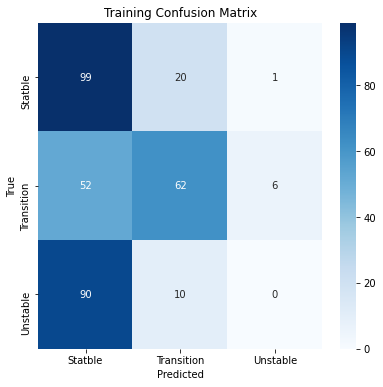

In [33]:
status_of_signal = ['Statble','Transition','Unstable']
plt.figure(figsize=(14,6))
plt.subplot(121)
sns.heatmap(test_confu_matrix_svm, annot= True,fmt = "d",
xticklabels=status_of_signal, yticklabels=status_of_signal, cmap = "Blues")
plt.title('Training Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()

## random forest

In [35]:

with open('model_rf_8f_all','rb') as f:
    rf= pickle.load(f)



In [36]:

test_predictions_rf = rf.predict(test_scaled)


In [37]:
test_accu = accuracy_score(test['Status'], test_predictions_rf)
print("Ovearll testing accuracy: ", test_accu)



Ovearll testing accuracy:  0.5911764705882353


In [38]:
test_confu_matrix_rf= confusion_matrix(test['Status'], test_predictions_rf)


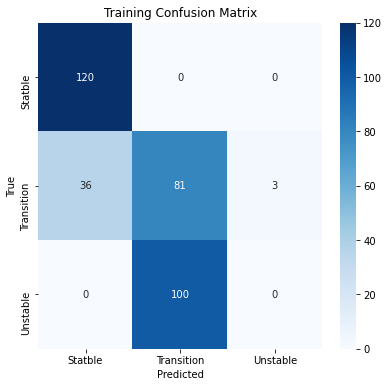

In [39]:
status_of_signal = ['Statble','Transition','Unstable']
plt.figure(figsize=(14,6))
plt.subplot(121)
sns.heatmap(test_confu_matrix_rf, annot= True,fmt = "d",
xticklabels=status_of_signal, yticklabels=status_of_signal, cmap = "Blues")
plt.title('Training Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()

## Bagging

In [41]:

with open('model_bag_8f_all','rb') as f:
    bag= pickle.load(f)



In [42]:
test_predictions_bag = bag.predict(test_scaled)


In [43]:
test_accu = accuracy_score(test['Status'], test_predictions_bag)
print("Ovearll testing accuracy: ", test_accu)


Ovearll testing accuracy:  0.4264705882352941


In [44]:
test_confu_matrix_bag= confusion_matrix(test['Status'], test_predictions_bag)



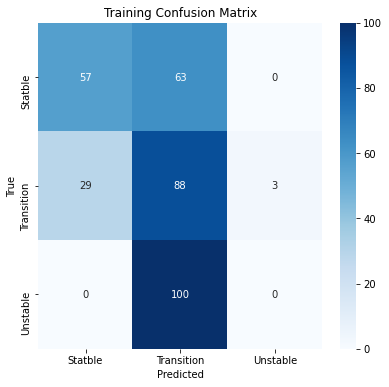

In [45]:
status_of_signal = ['Statble','Transition','Unstable']
plt.figure(figsize=(14,6))
plt.subplot(121)
sns.heatmap(test_confu_matrix_bag, annot= True,fmt = "d",
xticklabels=status_of_signal, yticklabels=status_of_signal, cmap = "Blues")
plt.title('Training Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()